In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Mining

In [8]:
df=pd.read_csv('/content/drive/MyDrive/Project/TopCV Job Salary Analysis/tidy_data.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14067 entries, 0 to 14066
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   category          14067 non-null  object 
 1   category_type     14067 non-null  object 
 2   job_address       14067 non-null  object 
 3   Longitude         14067 non-null  float64
 4   Latitude          14067 non-null  float64
 5   city              14066 non-null  object 
 6   district          12999 non-null  object 
 7   suburb            11883 non-null  object 
 8   job_id            14067 non-null  int64  
 9   job_name          14067 non-null  object 
 10  working_form      14067 non-null  object 
 11  level             14067 non-null  object 
 12  gender            14067 non-null  object 
 13  exp               14067 non-null  float64
 14  degree            14067 non-null  object 
 15  language          14067 non-null  object 
 16  BH                14067 non-null  int64 

## Univariate analysis

<Axes: xlabel='salary', ylabel='Count'>

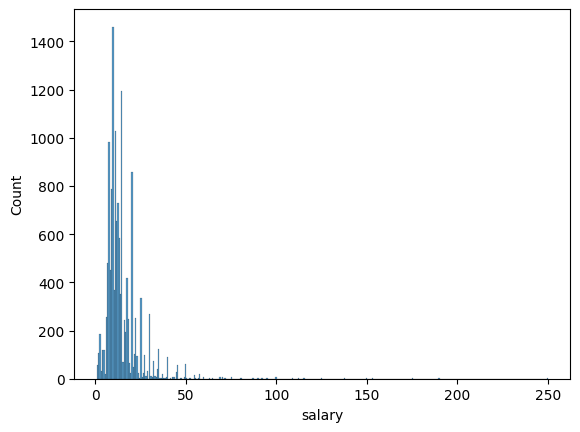

In [10]:
sns.histplot(x=df['salary'])

Looking at the salary distribution chart, it can be seen that salaries are mainly concentrated in the range from 1 to 30 million. Jobs with rates higher than 100 million/month also appear but with very low frequency.

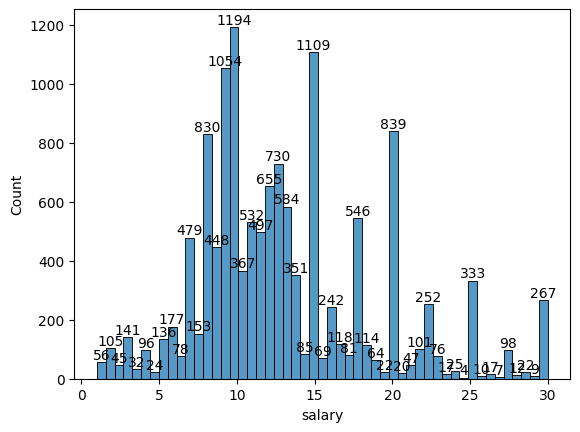

In [11]:
ax=sns.histplot(x=df[df['salary']<=30]['salary'])
ax.bar_label(ax.containers[0]);

Zoom in the salary range from 1 to 30. The most popular salary is 10 million with 1194 job postings, followed by salaries of 15 million, 9 million and 20 million a month.

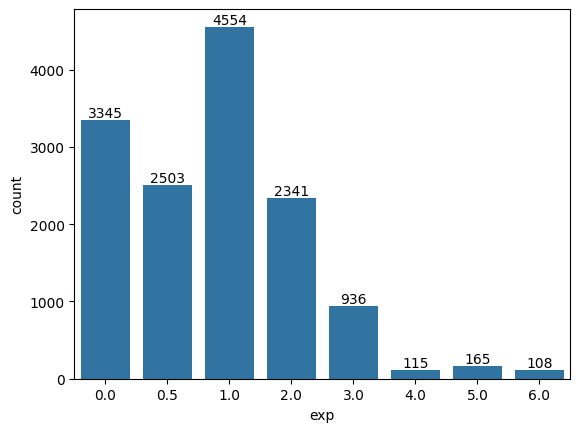

In [12]:
ax = sns.countplot(x=df['exp'])
ax.bar_label(ax.containers[0]);

On the TopCV website, job postings requiring 1 year of experience account for the largest number (4,554), followed by jobs that do not require experience (3,345). Jobs requiring 4 years or more of experience account for a very small number (388), only about 2.7% of the total number of job postings. This shows that the recruitment trend on this platform mainly focuses on people who do not have too much experience.

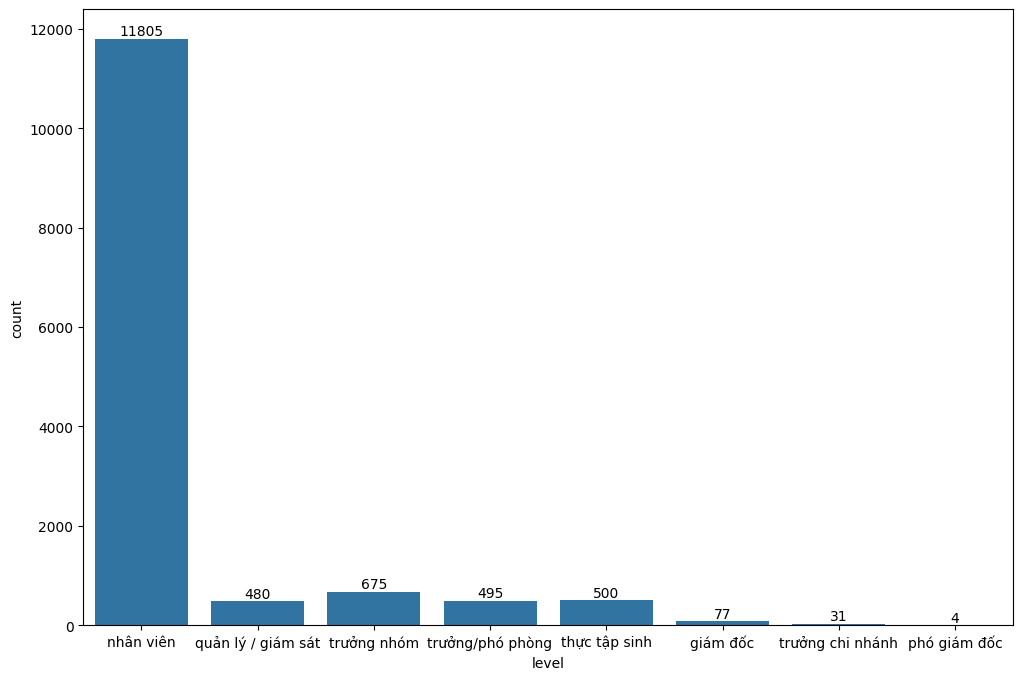

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x=df['level'])
ax.bar_label(ax.containers[0]);

Recruiting employees (nhân viên) accounts for nearly 85% of the number of job postings with 11,805 jobs recruiting employees, followed by team leaders (trưởng nhóm), interns (thực tập sinh), department heads/deputy managers (trưởng/phó phòng), managers/supervisors (quản lý/giám sát) with about 5-600 job postings. use. Higher positions, reserved for people with more experience such as directors (giám đốc), deputy directors (phó giám đốc), and branch heads (trưởng chi nhánh), have very few vacancies. This is completely reasonable because on the experience statistics chart above, jobs requiring more than 4 years of experience are very few.

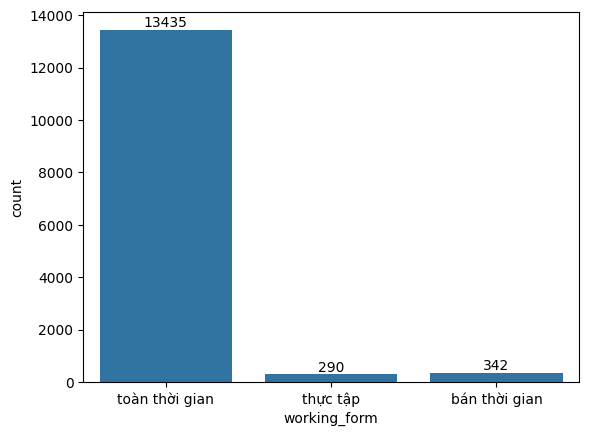

In [ ]:
ax = sns.countplot(x=df['working_form'])
ax.bar_label(ax.containers[0]);

It can be seen that most companies in Vietnam want their employees to work full-time (toàn thời gian) with 13435 (95% of job postings) requiring full-time work. The other two forms of work, internship (thực tập) and part-time (bán thời gian), have an equivalent number of about 300 job postings.

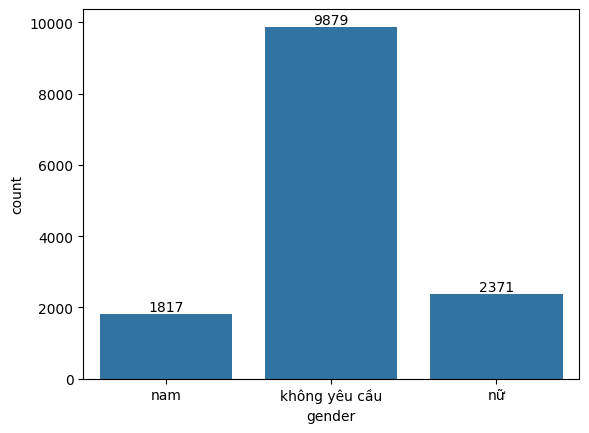

In [ ]:
ax = sns.countplot(x=df['gender'])
ax.bar_label(ax.containers[0]);

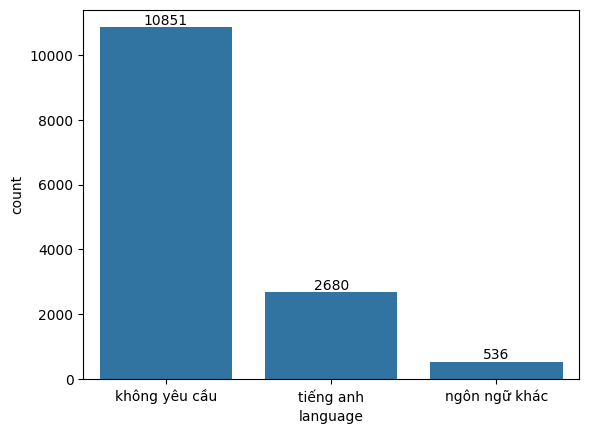

In [ ]:
ax = sns.countplot(x=df['language'])
ax.bar_label(ax.containers[0]);

Jobs with other requirements such as foreign language and gender account for a low percentage. Most jobs do not require gender or foreign language. However, it can be seen that the job requirements for English are much higher than for all other languages (Chinese, Korean, Japanese,...), this shows that candidates who learn English will have an advantage. compared to candidates studying other languages.

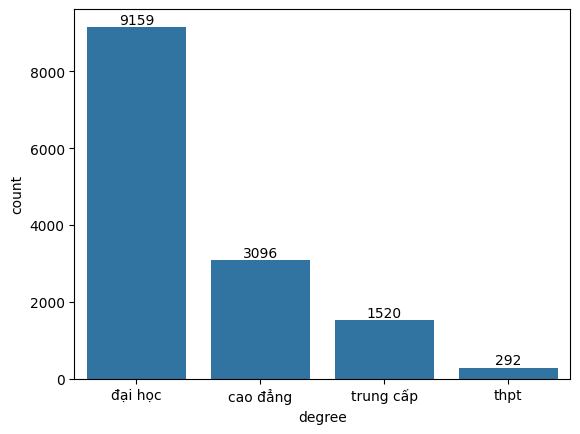

In [ ]:
ax = sns.countplot(x=df['degree'])
ax.bar_label(ax.containers[0]);

Regarding qualifications, jobs requiring candidates to have at least a university degree accounted for the majority with 9,159 job postings (65%), followed by college degree with 3,096 job posts. This shows that degree are really important when looking for a job in the Vietnamese's job market. There are only very few jobs that allow candidates to use intermediate degree and high school degrees.

<Axes: xlabel='city'>

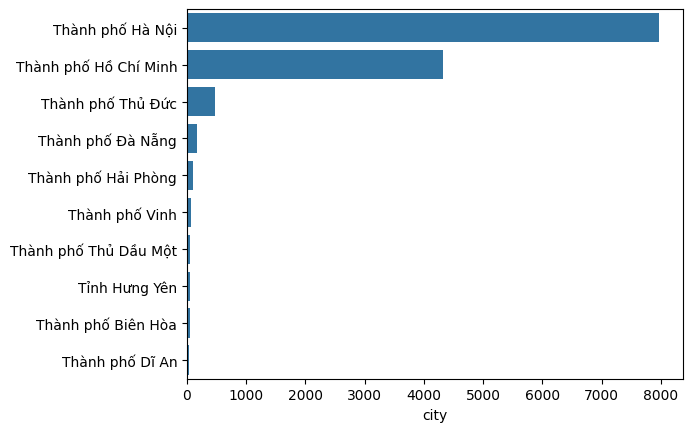

In [ ]:
city_count = df['city'].value_counts()
sns.barplot(city_count.head(10),orient = 'h')

Normally, the two cities have the most jobs are Hanoi and Ho Chi Minh City, and
the data from TopCV platform is similar. The number of jobs in Hanoi is the highest and twice as many as the number of jobs in Ho Chi Minh City. Thu Duc City (Including Thu Duc District, District 2 and District 9) has the 3rd highest number of jobs.

## Bivariate analysis

<Axes: xlabel='exp', ylabel='salary'>

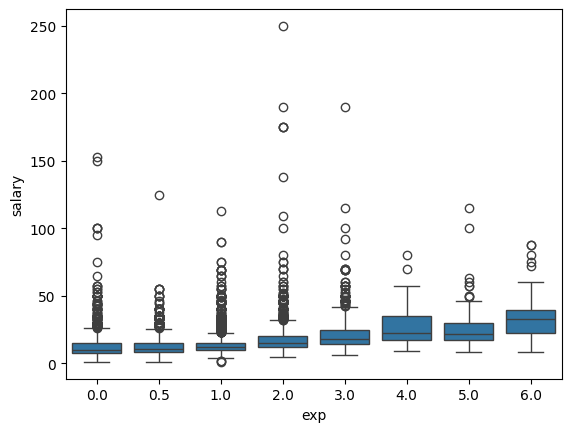

In [13]:
sns.boxplot(x=df['exp'],y=df['salary'])

The boxplot above shows the correlation between years of experience and salary. As the number of years of experience increases, the average salary also increases. For jobs that do not require experience, the salary ranges from 7.5 - 15 million. When you have 1 year of experience, the salary increases from 10 - 16 million and reaches the highest level when the job requires the most experience of 6 years with an average salary of 32.5 million and concentrated in the range of 22.5 to 40 million. . From the above results, it can be concluded that experience has an impact on salary for employers.

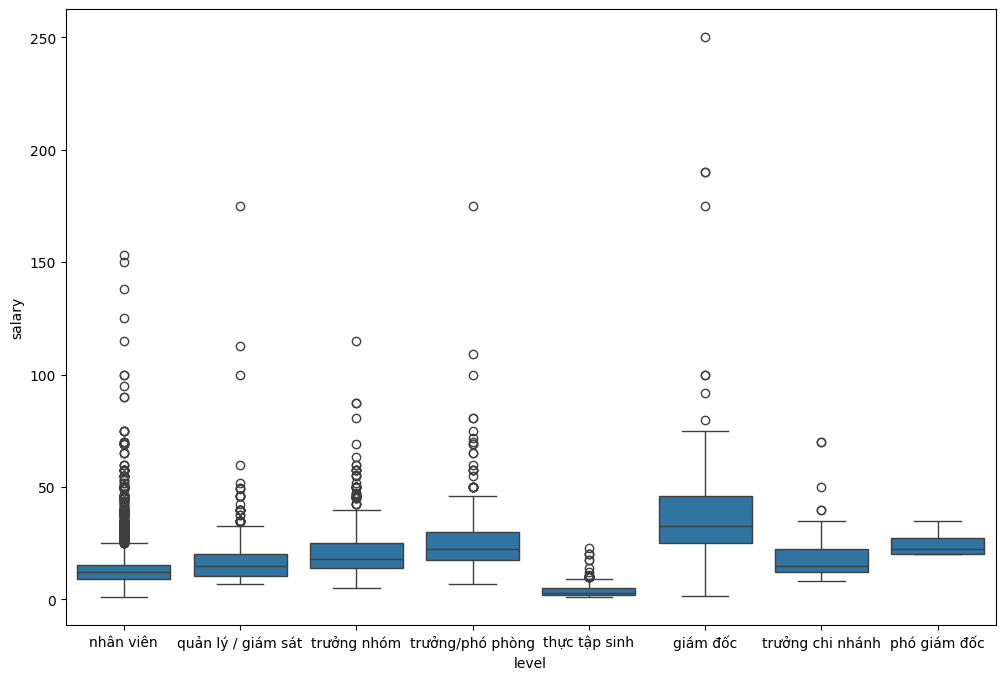

In [15]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x=df['level'],y=df['salary'])

Looking at the chart above, we can see that interns have the lowest average salary, which is also understandable in the job market. Salaries increase with higher-ranking jobs, and director is the position with the highest average salary. Director salaries are concentrated in the range of 24.5 to 46 million, this salary is quite similar to the salary of jobs requiring 6 years of experience. Employees with the second lowest average salary are only higher than trainees but contain many outliers. These outliers have a salary of more than 100 million/month, this is a very high salary for a job in Vietnam or it can also be a typo/scam. Similarly for interns, there are also some jobs with unusually high salaries.

<Axes: xlabel='company_type', ylabel='salary'>

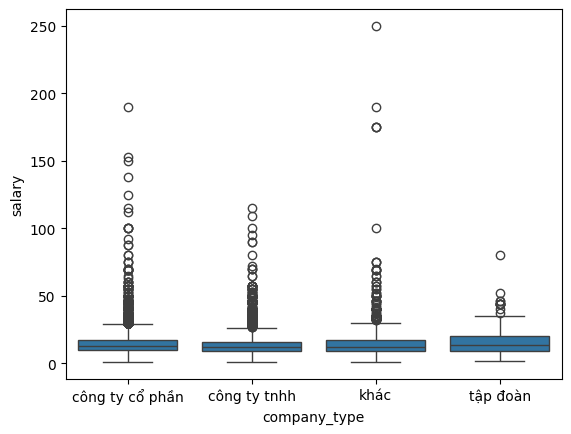

In [16]:
sns.boxplot(x=df['company_type'],y=df['salary'])

Looking at the chart above, it can be seen that there is almost no difference between types of companies in terms of average salary, IQR and Outlier. It can be concluded that the type of company does not affect salary.

<Axes: xlabel='num_recruits', ylabel='salary'>

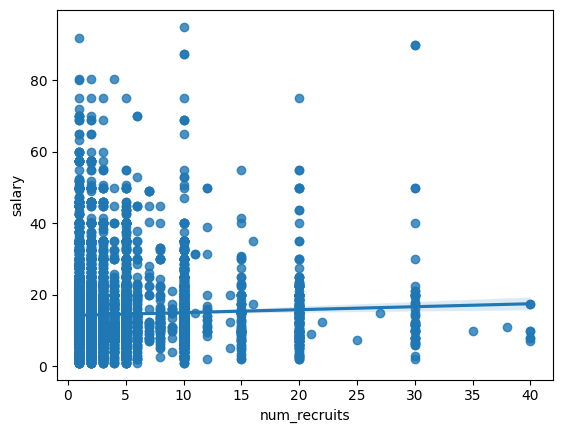

In [ ]:
sns.regplot(x='num_recruits', y='salary', data=df[(df['salary']<100) & (df['num_recruits']<50)])

Scatterplot represents the correlation between the number of hires and salary. The linear regression line is almost parallel to the x-axis, meaning that when the value of the recruitment quantity variable increases, the value of the salary variable is almost unchanged. Proves that a recruitment post recruiting more or less people does not reflect the salary level.

<Axes: xlabel='gender', ylabel='salary'>

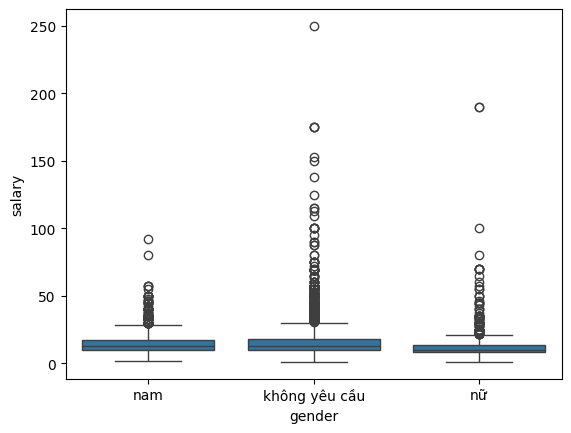

In [17]:
sns.boxplot(x=df['gender'], y=df['salary'])

There is not much difference in salary according to gender requirements in job postings. Jobs that do not require gender have the largest number of vacancies and also have the highest salaries, concentrated in the range of 10 to 18 million. Although the number of jobs that require a female gender is greater than that of men, the average salary is lower than the jobs that require a male gender.

<Axes: xlabel='language', ylabel='salary'>

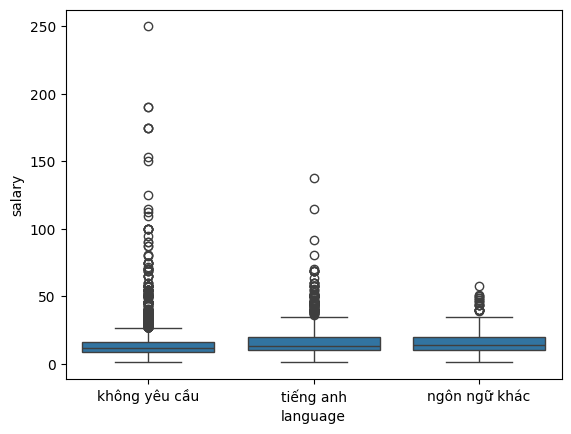

In [18]:
sns.boxplot(x=df['language'], y=df['salary'])

Jobs that do not require foreign languages, although having the highest number of job postings, have the lowest average salary. Jobs that require English or other foreign languages have salaries ranging from 10 to 20 million. It can be seen that people who learn foreign languages other than English, although there are fewer jobs, the salary will not be lower than that of English.

<Axes: xlabel='degree', ylabel='salary'>

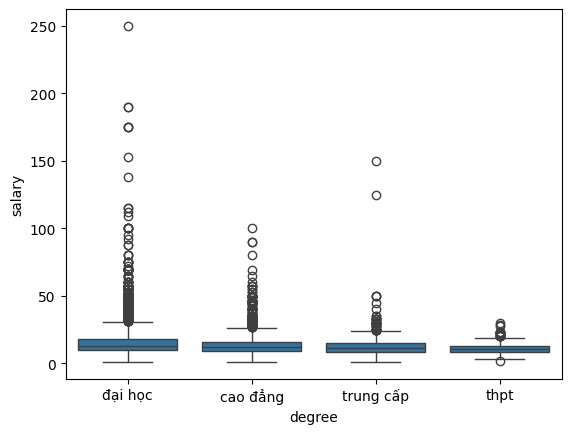

In [19]:
sns.boxplot(x=df['degree'], y=df['salary'])

It can be seen that jobs requiring higher degrees will have higher average salaries.

## ANOVA and Kendalltau

ANOVA and Kendalltau are often used to test whether there is a correlation between categorical input variables and numerical output variables (salary).

In [ ]:
#Null Hypothesis: There is no significant association between predictor variables and target variables
#Alternate Hypothesis: There is a significant association between predictor variables and target variables

In [ ]:
from sklearn.feature_selection import f_classif
ANOVA, p_value = zip(*[f_classif(df[['salary']], df[cols]) for cols in cate_cols])
ANOVA_values = [result[0] for result in ANOVA]
p_value_values = [result[0] for result in p_value]
df_ANOVA = pd.DataFrame({'feaute':cate_cols,"ANOVA":ANOVA_values, "p_value":p_value_values})

In [ ]:
df_ANOVA.sort_values(by='ANOVA', ascending=False)

,feaute,ANOVA,p_value
2,category_type,455.352128,2.411267e-192
4,level,409.025116,0.000000e+00
0,exp,327.629366,0.000000e+00
3,working_form,280.440454,3.733917e-120
5,gender,108.675847,1.457705e-47
7,language,75.851659,1.715703e-33
6,degree,57.311238,8.146321e-37
8,BH,11.540339,6.829085e-04
9,company_type,11.266141,2.227318e-07
1,num_other_job,9.861483,7.007530e-11


In [ ]:
from scipy.stats import kendalltau
res, p_value = zip(*[kendalltau(df[['salary']], df[cols]) for cols in cate_cols])
df_kendalltau = pd.DataFrame({'feaute':cate_cols,"kendalltau":res, "p_value":p_value})

In [ ]:
df_kendalltau.sort_values(by='kendalltau', ascending=False)

,feaute,kendalltau,p_value
0,exp,0.310716,0.000000e+00
3,working_form,0.235293,2.729846e-249
7,language,0.095331,2.570774e-43
4,level,0.082457,8.427657e-34
8,BH,0.075219,8.131552e-27
2,category_type,0.067727,2.054641e-23
6,degree,0.060682,2.003012e-19
1,num_other_job,0.055640,2.654583e-19
9,company_type,-0.029184,1.369911e-05
5,gender,-0.119415,1.954407e-69


The results show that the p_value of both algorithms is less than the significance level of 0.05 and very close to 0, so to determine which attributes really affect the salary variable, it is necessary to use ANOVA and kendalltau values.
  - With ANOVA, the higher the ANOVA value, the more that variable is considered to affect the target variable. Attributes such as category_type, level, exp, working_form and gender with the highest ANOVA index will be considered more influential on salary. Attributes such as insurance, company_type or num_other_job have a lower ANOVA than other attributes, so they will be considered not to have much impact on salary. This is similar to the results of multivariate analysis above.
  - For Kendalltau, the closer the kendalltau value is to -1 and 1, it will be highly correlated with the salary variable, and the closer the value is to 0, the more unrelated it will be to the salary variable. The variables with high influence are exp, working_form, gender, language and level and the variables company_type, num_other_job, degree, category_type have lower influence.

Thus, attributes such as exp, working_form, level are the most important attributes because they always have higher ANOVA and kendalltau indexes. The attributes company_type and num_other_job can be considered as two redundant attributes because they always have low ANOVA and Kendalltau indexes. These two attributes can be removed if using this data set for regression/classification models. .